In [1]:
from PIL import Image
import requests



In [2]:
import torch
from transformers import pipeline

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pipe = pipeline(task="image-feature-extraction", model_name="google/vit-base-patch16-224", device=DEVICE, pool=True)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [23]:
import os
image_folder = r'D:\BIOMETRIC_PROJECT\MMU\MMU-Iris-Database'
list_of_folder  = [filename for filename in os.listdir(image_folder)]
image_paths = []
features_dict = {}
# print(list_of_folder)

id = 0
print(list_of_folder)
for i in range(len(list_of_folder)):
    

# # for i in range(8):
    filename = list_of_folder[i]
    path =  os.path.join(image_folder, filename)
    left_files = []
    right_files = []
   
    for folder_name in os.listdir(path):
        # print(folder_name)
        folders =  os.path.join(path, folder_name)
        
        for file_name in os.listdir(folders):
            # print(file_name[-6:-5],file_name[-4:])
            actualpat =  os.path.join(folders, file_name)
            
            if file_name[-4:]==".bmp" and file_name[-6:-5]=="l":
                left_files.append(actualpat)
            if file_name[-4:]==".bmp" and file_name[-6:-5]=="r":
                right_files.append(actualpat)


    print(left_files)
    print(right_files)
    for i in range(min(len(left_files),len(right_files))):
        # os.path.join(path, file)
        
        images = {"left":Image.open(left_files[i]).convert("RGB"),
                  "right":Image.open(right_files[i]).convert("RGB"),
                 "id":filename}
        # print(images)
        features_dict[str(id)] = images
        id = id+1



['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '5', '6', '7', '8', '9']
['D:\\BIOMETRIC_PROJECT\\MMU\\MMU-Iris-Database\\1\\left\\aeval1.bmp', 'D:\\BIOMETRIC_PROJECT\\MMU\\MMU-Iris-Database\\1\\left\\aeval2.bmp', 'D:\\BIOMETRIC_PROJECT\\MMU\\MMU-Iris-Database\\1\\left\\aeval3.bmp', 'D:\\BIOMETRIC_PROJECT\\MMU\\MMU-Iris-Database\\1\\left\\aeval4.bmp', 'D:\\BIOMETRIC_PROJECT\\MMU\\MMU-Iris-Database\\1\\left\\aeval5.bmp']
['D:\\BIOMETRIC_PROJECT\\MMU\\MMU-Iris-Database\\1\\right\\aevar1.bmp', 'D:\\BIOMETRIC_PROJECT\\MMU\\MMU-Iris-Database\\1\\right\\aevar2.bmp', 'D:\\BIOMETRIC_PROJECT\\MMU\\MMU-Iris-Database\\1\\right\\aevar3.bmp', 'D:\\BIOMETRIC_PROJECT\\MMU\\MMU-Iris-Database\\1\\right\\aevar4.bmp', 'D:\\BIOMETRIC_PROJECT\\MMU\\MMU-Iris-Database\\1\\right\\aevar5.bmp']
['D:\\BIOMETRIC_PROJECT\\MMU\\

In [24]:

len([key for key in features_dict])
features_dict["0"]

{'left': <PIL.Image.Image image mode=RGB size=320x240>,
 'right': <PIL.Image.Image image mode=RGB size=320x240>,
 'id': '1'}

In [25]:
len(features_dict)



224

In [27]:
from PIL import Image, ImageOps
from torchvision import transforms
from datasets import Dataset


# Define data augmentation transforms for PIL images
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomResizedCrop(size=(192, 192), scale=(0.8, 1.0)),
])

# Create a new dataset to store both original and augmented images


# Add original images to the new dataset

data_feature_label = {}
# Apply data augmentation and add augmented images to the new dataset
# for image, label, file_path in zip(dataset["image"], dataset["labels"], dataset["image_file_path"]):
id1 = 0
for item in features_dict:
    dict1 = features_dict[item]
    id_name = dict1["id"]
    images = {"left":pipe(dict1["left"]),"right":pipe(dict1["right"]),"id":id_name}
    data_feature_label[str(id1)] = images
    id1+=1

    print(id_name,item)
    left_image = data_transform(dict1["left"])
    right_image = data_transform(dict1["right"])
    images = {"left":pipe(left_image),"right":pipe(right_image),"id":id_name}
    data_feature_label[str(id1)] = images
    id1+=1
   

    # # Append augmented image and corresponding label to the new dataset
    # combined_data["image_file_path"].append(f"{file_path}_augmented.jpg")  # Adjust the filename as needed
    # combined_data["image"].append(augmented_image)
    # combined_data["labels"].append(label)



1 0
1 1
1 2
1 3
1 4
10 5
10 6
10 7
10 8
10 9
11 10
11 11
11 12
11 13
11 14
12 15
12 16
12 17
12 18
12 19
13 20
13 21
13 22
13 23
14 24
14 25
14 26
14 27
14 28
15 29
15 30
15 31
15 32
15 33
16 34
16 35
16 36
16 37
16 38
17 39
17 40
17 41
17 42
17 43
18 44
18 45
18 46
18 47
18 48
19 49
19 50
19 51
19 52
19 53
2 54
2 55
2 56
2 57
2 58
20 59
20 60
20 61
20 62
20 63
21 64
21 65
21 66
21 67
21 68
22 69
22 70
22 71
22 72
22 73
23 74
23 75
23 76
23 77
23 78
24 79
24 80
24 81
24 82
24 83
25 84
25 85
25 86
25 87
25 88
26 89
26 90
26 91
26 92
26 93
27 94
27 95
27 96
27 97
27 98
28 99
28 100
28 101
28 102
28 103
29 104
29 105
29 106
29 107
29 108
3 109
3 110
3 111
3 112
3 113
30 114
30 115
30 116
30 117
30 118
31 119
31 120
31 121
31 122
31 123
32 124
32 125
32 126
32 127
32 128
33 129
33 130
33 131
33 132
33 133
34 134
34 135
34 136
34 137
34 138
35 139
35 140
35 141
35 142
35 143
36 144
36 145
36 146
36 147
36 148
37 149
37 150
37 151
37 152
37 153
38 154
38 155
38 156
38 157
38 158
39 159
39 16

In [31]:
len(data_feature_label)

import pickle


# # Open a file in binary write mode
# with open("data_new_mmu.pickle", "wb") as f:
#     # Serialize and save the object to the file
#     pickle.dump(data_feature_label, f)


In [3]:

import pickle

with open("data_new_mmu.pickle", "rb") as f:
    data = pickle.load(f)

len(data)
data_feature_label = data

In [4]:
len(data_feature_label)

448

In [5]:
import pandas as pd


# df = pd.DataFrame().from_dict(data_feature_label)
# df.to_csv("mmu_.csv")

In [6]:
import numpy as np
def generate_orthogonal_matrix(key):
    # Use the key to seed the random number generator
    np.random.seed(key)
    
    # Create a random 4x4 matrix
    random_matrix = np.random.rand(4, 4)
    
    # Perform Gram-Schmidt process to make the matrix orthogonal
    def gram_schmidt(A):
        Q, _ = np.linalg.qr(A)  # QR decomposition provides an orthogonal Q
        return Q

    orthogonal_matrix = gram_schmidt(random_matrix)
    orthogonal_vector = orthogonal_matrix.flatten().reshape(16, 1)
    
    
    return orthogonal_vector

In [7]:



# Example usage
images = []
labels_arr = []


for id1 in data_feature_label:
    vector_lx768 = np.array(data_feature_label[id1]["left"][0])
    vector_lx768 = vector_lx768.reshape(1, 768)
    # print(data_feature_label["0"])
    vector_rx768 = np.array(data_feature_label[id1]["right"][0])
    vector_rx768 = vector_rx768.reshape(1, 768)
    key = int(data_feature_label[id1]["id"])
    orthogonal_matrix = generate_orthogonal_matrix(key)
    
    left_projection_matrix = np.dot(orthogonal_matrix, vector_lx768)
    Right_projection_matrix = np.dot(orthogonal_matrix, vector_rx768)
    # print(left_projection_matrix.shape,Right_projection_matrix.shape)
    Cancelabel_matrix = np.multiply(left_projection_matrix, Right_projection_matrix)
    # for item in data_feature_label:
        # print(data_feature_label[item])
    # print(Cancelabel_matrix.shape)
    images.append(Cancelabel_matrix)
    labels_arr.append(data_feature_label[id1]["id"])
# print(result_matrix.shape)

In [8]:
np.unique(labels_arr)

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '40', '41', '42', '43', '44', '45', '46', '5', '6', '7', '8', '9'],
      dtype='<U2')

In [9]:
len(images)

448

In [14]:
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow.keras.layers as layers

num_classes =np.unique(labels_arr)
model = Sequential([
    layers.Flatten(input_shape=(16,768,1)),  
    layers.Dense(2084, activation='relu'),   # Flatten the input
    layers.Dense(1024, activation='relu'), 
  
    layers.Dropout(0.5),                           # Dropout for regularization
                            # Dropout for regularization
   
    layers.Dense(47, activation='softmax')# Output layer for classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



D:\ENV\DEEP\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │       6,144,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 47)                  │          23,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,168,047 (23.53 MB)

 Trainable params: 6,168,047 (23.53 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
all_images = []
for i in range(448):
    all_images.append(images[i].reshape( 16, 768, 1))
all_images[0].shape



(16, 768, 1)

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.2724 - loss: 3.0998 - val_accuracy: 0.8333 - val_loss: 1.0515
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9677 - loss: 0.4493 - val_accuracy: 0.9889 - val_loss: 0.1737
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9906 - loss: 0.0611 - val_accuracy: 1.0000 - val_loss: 0.0637
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 1.0000 - loss: 0.0132 - val_accuracy: 0.9889 - val_loss: 0.0590
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.9889 - val_loss: 0.0538
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9905 - loss: 0.0520
Test Loss: 0.05376526340842247
Test Accuracy: 0.9888888597488403


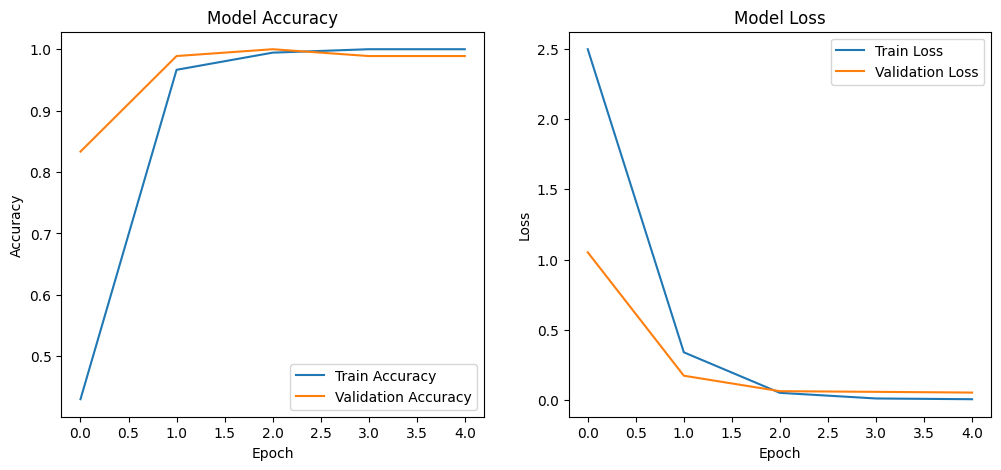

In [16]:
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

# images = np.array(images).reshape(100, 16, 768, 1)
# Assuming `images` is your dataset and `labels` is your label array
all_images = np.array(all_images).reshape(448, 16, 768, 1)
X_train, X_test, y_train, y_test = train_test_split(all_images, labels_arr, test_size=0.2, random_state=42)



y_train_cat = to_categorical(y_train, num_classes=47)
y_test_cat = to_categorical(y_test, num_classes=47)



history = model.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test, y_test_cat))


test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)



print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plotting training history for accuracy and loss if desired
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [48]:
model.save("best_model_mmu.h5")


In [11]:
# import keras
# keras.saving.save_model(model, "best_model.keras")

from tensorflow.keras.models import load_model

# Load the model
model = load_model("best_model.keras")



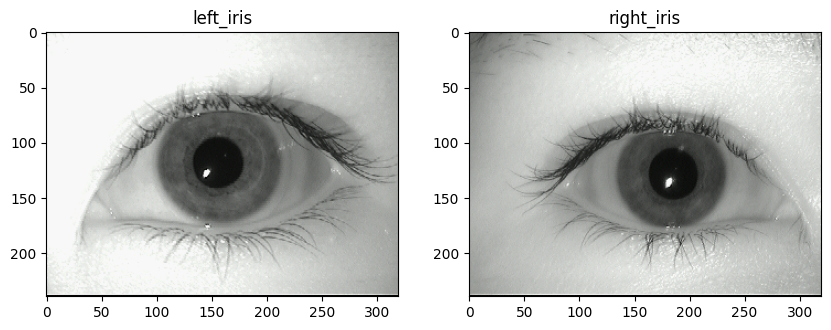

In [41]:
from PIL import Image
import matplotlib.pyplot as plt

left_iris = Image.open( r"D:\BIOMETRIC_PROJECT\MMU\MMU-Iris-Database\1\left\aeval1.bmp").convert("RGB")
right_iris = Image.open(r"D:\BIOMETRIC_PROJECT\MMU\MMU-Iris-Database\1\right\aevar1.bmp" ).convert("RGB")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

axes[0].imshow(left_iris)

axes[0].set_title("left_iris")

axes[1].imshow(right_iris)

axes[1].set_title("right_iris")

plt.show()

In [42]:

fv_left_iris = pipe(left_iris)
fv_right_iris = pipe(right_iris)



In [43]:
fv_left_iris = np.array(fv_left_iris).reshape(1, 768)
fv_right_iris = np.array(fv_right_iris).reshape(1, 768)
key = 1
orthogonal_matrix = generate_orthogonal_matrix(key)
left_projection_matrix = np.dot(orthogonal_matrix, fv_left_iris)
Right_projection_matrix = np.dot(orthogonal_matrix, fv_right_iris)
Cancelabel_matrix = np.multiply(left_projection_matrix, Right_projection_matrix)

In [44]:
# Cancelabel_matrix= Cancelabel_matrix.reshape( 16, 768, 1)

In [45]:
Cancelabel_matrix = np.expand_dims(Cancelabel_matrix, axis=-1)  # Shape becomes (16, 768, 1)
Cancelabel_matrix = np.expand_dims(Cancelabel_matrix, axis=0)   

In [46]:
Cancelabel_matrix.shape

(1, 16, 768, 1)

In [47]:

# Predict the class
predictions = model.predict(Cancelabel_matrix)
predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest probability

print("Predicted class:", predicted_class[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted class: 1
